# ME 793 - Assignment 7
Moitreyee Sarkar- 18D170020

#Q 1. Solve equation dy/dx = 2x4 + exp(−x); y(x = 0) = 0 using neural network.

In [83]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
from autograd.misc.optimizers import adam
import time

In [84]:
def init_random_params(scale, layer_sizes, rs=npr.RandomState(0)):
#Define a list of (weights, biases tuples, one for each layer."
    return [(rs.randn(insize, outsize) * scale,   # weight matrix
             rs.randn(outsize) * scale)           # bias vector
            for insize, outsize in zip(layer_sizes[:-1], layer_sizes[1:])]

In [85]:
# Define a sigmoid activation function. Can also be used from library. This is a simple definition.
def sigmoid_activation(x):
    "see https://arxiv.org/pdf/1710.05941.pdf"
    return x / (1.0 + np.exp(-x))

In [86]:
# Define function y based on neural networks. Outputs are linearly related to biases and weights.
# Outputs of one layer are used as inputs to another layer via activation function.
def y(params, inputs):
    "Neural network functions"
    for W, b in params:
        outputs = np.dot(inputs, W) + b
        inputs = sigmoid_activation(outputs)    
    return outputs

In [87]:
# Make an initial guess of params:
params = init_random_params(0.1, layer_sizes=[1, 8, 1])

In [88]:
dydx = elementwise_grad(y, 1) # this is the partial derivative of y w/t x

In [89]:
y0 = 0.0
x = np.linspace(0, 20).reshape((-1, 1))

In [90]:
# Define the objective function.
def lossfunction(params, step):
    # The objective is to minimize to zero.
    # dydx = -k * exp(-x)
    # dy/dx = 2x^4 + exp(-x) # This is the real equation that we want to solve in the current notebook.
    zeq = dydx(params, x) - (2*(x**4) - np.exp(-x))
    ic = y(params, 0) - y0 # For my solution i.e. a set of paramaters 'params' this condition should be satisfied
    # since this is the intial condition.
    # If I minimize zeq and ic together or in some combined form, I will get a set of 'params' that give me
    # solution of dy/dx
    # Let us setup the loss function as zeq + ic
    return np.mean(zeq**2) + ic**2

In [91]:
def callback(params, step, g):
    if step % 500 == 0:
        print("Iteration {0:3d} lossfunction {1}".format(step,
                                                      lossfunction(params, step)))

#Q 2. Show the effect of number of layers and neurons in each layer on the solution and solution time. You need to show your answer as graphs.

### Number of nodes 8

In [97]:
#ODE solver for 8 nodes
# grad(losfunciton) = d J(theta) / d theta
params = adam(grad(lossfunction), params,
              step_size=0.1, num_iters=10000, callback=callback) 

Iteration   0 lossfunction [[7.63773638e+09]]
Iteration 500 lossfunction [[7.63663277e+09]]
Iteration 1000 lossfunction [[7.63556818e+09]]
Iteration 1500 lossfunction [[7.6345057e+09]]
Iteration 2000 lossfunction [[7.63346618e+09]]
Iteration 2500 lossfunction [[7.63238392e+09]]
Iteration 3000 lossfunction [[7.63132786e+09]]
Iteration 3500 lossfunction [[7.63027491e+09]]
Iteration 4000 lossfunction [[7.62922276e+09]]
Iteration 4500 lossfunction [[7.62816173e+09]]
Iteration 5000 lossfunction [[7.62709006e+09]]
Iteration 5500 lossfunction [[7.62603606e+09]]
Iteration 6000 lossfunction [[7.6250005e+09]]
Iteration 6500 lossfunction [[7.62407599e+09]]
Iteration 7000 lossfunction [[7.62287688e+09]]
Iteration 7500 lossfunction [[7.62183296e+09]]
Iteration 8000 lossfunction [[7.62075674e+09]]
Iteration 8500 lossfunction [[7.61969829e+09]]
Iteration 9000 lossfunction [[7.61864712e+09]]
Iteration 9500 lossfunction [[7.61761049e+09]]


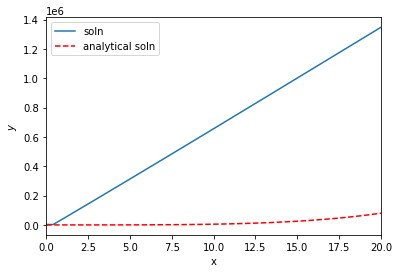

In [98]:
#Plot for 8 nodes
tfit = np.linspace(0, 20).reshape(-1, 1)
import matplotlib.pyplot as plt
plt.plot(tfit, y(params, tfit), label='soln') 
plt.plot(tfit, (((x**4)/2)-np.exp(-x)+y0+1), 'r--', label='analytical soln')
plt.legend()
plt.xlabel('x')
plt.ylabel('$y$')
plt.xlim([0, 20])
plt.savefig('odenn.png')

### Number of nodes 10

In [99]:
# Make an initial guess of params:
params = init_random_params(0.1, layer_sizes=[1, 10, 1])

In [100]:
#ODE solver 10 nodes
begin_at = time.time() 
params = adam(grad(lossfunction), params,
              step_size=0.1, num_iters=10000, callback=callback) 
end_at = time.time()
#duration['10'] = end_at-begin_at
#error['10'] = float(lossfunction(params, 100000))

Iteration   0 lossfunction [[1.22020785e+10]]
Iteration 500 lossfunction [[1.07444793e+10]]
Iteration 1000 lossfunction [[8.49157775e+09]]
Iteration 1500 lossfunction [[7.78718002e+09]]
Iteration 2000 lossfunction [[7.74454641e+09]]
Iteration 2500 lossfunction [[7.74260158e+09]]
Iteration 3000 lossfunction [[7.74110446e+09]]
Iteration 3500 lossfunction [[7.73964623e+09]]
Iteration 4000 lossfunction [[7.73823502e+09]]
Iteration 4500 lossfunction [[7.73678389e+09]]
Iteration 5000 lossfunction [[7.73535807e+09]]
Iteration 5500 lossfunction [[7.73395605e+09]]
Iteration 6000 lossfunction [[7.73259349e+09]]
Iteration 6500 lossfunction [[7.73111755e+09]]
Iteration 7000 lossfunction [[7.72970496e+09]]
Iteration 7500 lossfunction [[7.72834952e+09]]
Iteration 8000 lossfunction [[7.72689486e+09]]
Iteration 8500 lossfunction [[7.7254928e+09]]
Iteration 9000 lossfunction [[7.72410026e+09]]
Iteration 9500 lossfunction [[7.72269886e+09]]


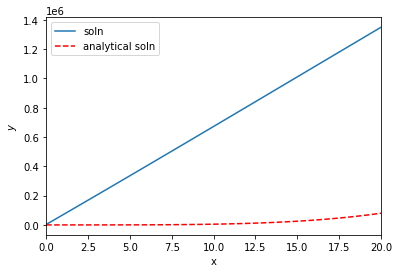

In [102]:
#Plot for 10 nodes
tfit = np.linspace(0, 20).reshape(-1, 1)
import matplotlib.pyplot as plt
plt.plot(tfit, y(params, tfit), label='soln') 
plt.plot(tfit, (((x**4)/2)-np.exp(-x)+y0+1), 'r--', label='analytical soln')
plt.legend()
plt.xlabel('x')
plt.ylabel('$y$')
plt.xlim([0, 20])
plt.savefig('odenn.png')

### Number of nodes 20

In [56]:
# Make an initial guess of params:
params = init_random_params(0.1, layer_sizes=[1, 20, 1])

In [57]:
# ODE solver for 20 nodes
begin_at = time.time() 
params = adam(grad(lossfunction), params,
              step_size=0.1, num_iters=10000, callback=callback) 

Iteration   0 lossfunction [[1.22020779e+10]]
Iteration 500 lossfunction [[8.36015479e+09]]
Iteration 1000 lossfunction [[7.46711153e+09]]


/usr/local/lib/python3.7/dist-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: overflow encountered in square
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))


Iteration 1500 lossfunction [[7.29880651e+09]]
Iteration 2000 lossfunction [[7.09356372e+09]]
Iteration 2500 lossfunction [[6.86618886e+09]]
Iteration 3000 lossfunction [[6.61980602e+09]]
Iteration 3500 lossfunction [[6.33486679e+09]]


/usr/local/lib/python3.7/dist-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in power
  return f_raw(*args, **kwargs)


Iteration 4000 lossfunction [[6.0454577e+09]]
Iteration 4500 lossfunction [[5.75621414e+09]]


/usr/local/lib/python3.7/dist-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)


Iteration 5000 lossfunction [[5.47292061e+09]]
Iteration 5500 lossfunction [[5.19931708e+09]]
Iteration 6000 lossfunction [[4.93894088e+09]]
Iteration 6500 lossfunction [[4.6940496e+09]]
Iteration 7000 lossfunction [[4.46883137e+09]]
Iteration 7500 lossfunction [[4.26577876e+09]]
Iteration 8000 lossfunction [[4.08660269e+09]]
Iteration 8500 lossfunction [[3.93261327e+09]]
Iteration 9000 lossfunction [[3.804154e+09]]
Iteration 9500 lossfunction [[3.7008338e+09]]


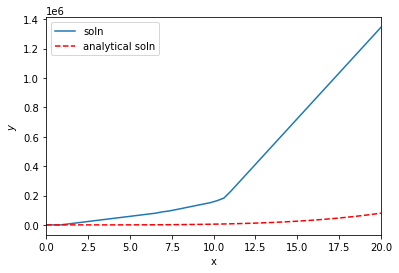

In [58]:
#plot for 20 nodes
tfit = np.linspace(0, 20).reshape(-1, 1)
import matplotlib.pyplot as plt
plt.plot(tfit, y(params, tfit), label='soln') 
plt.plot(tfit, (((x**4)/2)-np.exp(-x)+y0+1), 'r--', label='analytical soln')
plt.legend()
plt.xlabel('x')
plt.ylabel('$y$')
plt.xlim([0, 20])
plt.savefig('odenn.png')